In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

import seaborn as sns
import nltk
nltk.download('words')
pd.set_option('max_colwidth', 40)
import os
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
sws = set(stopwords.words('english'))
punctuation = set(string.punctuation)

[nltk_data] Downloading package words to /home/ubuntu/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
df = pd.read_json('data/data.json')

In [10]:
df_description = df[['description']]

In [35]:
df['acct_type'].unique()

array(['premium', 'tos_warn', 'fraudster_event', 'spammer_warn',
       'fraudster', 'locked', 'spammer_noinvite', 'spammer_limited',
       'tos_lock', 'fraudster_att'], dtype=object)

In [12]:
df_nums = df[['approx_payout_date', 'body_length', 'channels', 'delivery_method',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'name_length', 'num_order', 'num_payouts', 'object_id', 'org_facebook',
       'org_twitter', 'sale_duration', 'sale_duration2', 'show_map',
       'user_age', 'user_created', 'user_type', 'venue_latitude',
       'venue_longitude']]

In [11]:
def unique_col_indicator(df,col): 
    try:
        col_count = df.groupby(['user_created',col])['channels'].count().shape[0]
        user_count = df.groupby(['user_created'])['channels'].count().shape[0]
        if col_count == user_count:
            return True
        else:
           
            return False
    except:
        pass

In [13]:
def user_df():
    unique_cols = []
    for col in columns:
        if unique_col_indicator(df,col):
            unique_cols.append(col)
    user_unique_events = df.groupby('user_created').count().max(axis=1)
    user_unique_events = pd.DataFrame(user_unique_events,columns=['user_event_count'])
    return df[unique_cols].merge(user_unique_events,how='inner',on='user_created')

In [14]:
columns = ['acct_type', 'approx_payout_date', 'body_length', 'channels', 'country',
       'currency', 'delivery_method', 'description', 'email_domain',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'sale_duration',
       'sale_duration2', 'show_map', 'ticket_types', 'user_age',
       'user_created', 'user_type', 'venue_address', 'venue_country',
       'venue_latitude', 'venue_longitude', 'venue_name', 'venue_state']


In [249]:
def user_unique_events_col():
    user_unique_events = df.groupby('user_created').count().max(axis=1)
    user_unique_events =  pd.DataFrame(user_unique_events,columns=['user_event_count'])
    return df.merge(user_unique_events,how='inner',on='user_created')

In [224]:
user_unique_events = df.groupby('user_created').count().max(axis=1)
user_unique_events = pd.DataFrame(user_unique_events,columns=['user_event_count'])

In [15]:
def user_event_count():
    df['user_event_count'] = df.groupby('user_created').count().max(axis=1)
    return df

In [262]:
def drop_cols():
    df.drop(['acct_type'],axis=1)
    return df

In [256]:
def create_target():
    df['fraud'] = df['acct_type'].map({'fraudster_event': 1, 
                                   'premium': 0, 
                                   'spammer_warn': 0, 
                                   'fraudster': 1,
                                   'spammer_limited': 0, 
                                   'spammer_noinvite': 0,
                                   'locked': 1, 
                                   'tos_lock': 0,
                                   'tos_warn': 0,
                                   'fraudster_att': 1,
                                   'spammer_web': 0,
                                   'spammer': 0})
    return df

In [260]:
df = create_target()

In [274]:
num_columns = ['approx_payout_date', 'body_length', 'channels', 'delivery_method',
       'event_created', 'event_end', 'event_published', 'event_start',
       'fb_published', 'gts', 'has_analytics', 'has_header', 'has_logo',
       'name_length', 'num_order', 'num_payouts', 'object_id', 'org_facebook',
       'org_twitter', 'sale_duration', 'sale_duration2', 'show_map',
       'user_age', 'user_created', 'user_type', 'venue_latitude',
       'venue_longitude', 'user_event_count', 'user_unique_events','fraud']

target_column = ['fraud']

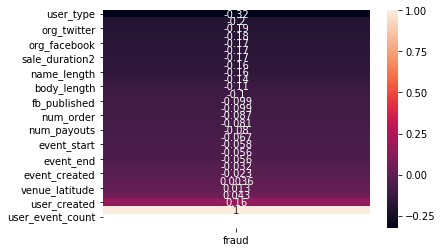

In [317]:

sns.heatmap(corr_df,annot=True)

In [16]:
def low_cor_cols(r_score):
    df[num_columns].corr()[['fraud']].values
    corr_df = df[num_columns].corr()[['fraud']].sort_values('fraud')
    low_corr_mask = corr_df.sort_values('fraud').abs().lt(r_score).values.reshape(1,-1)[0]
    return corr_df[low_corr_mask]

In [17]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import re
from string import digits
import nltk
from html.parser import HTMLParser

'''you must have nltk packages installed to run this file. To do so run the following commands:

import ntlk 
nltk.download()

A new window should open, showing the NLTK Downloader. Click on the File menu and select Change Download Directory. 
For central installation, set this to C:\nltk_data (Windows), /usr/local/share/nltk_data (Mac)'''

class MLStripper(HTMLParser):
    '''This class parses HTML from the description column
    input: string
    output: string'''
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

def clean_desc(df):

    '''cleans the data. see below for documentation. adds three new columns:
    df['description_clean'] is the new cleaned description data
    df['description_html'] are the descriptions written in html
    df['description_none'] are the descriptions with no text
    '''
    
    #creates a new column for all events using HTML invites
    df['description_html'] = df['description'].apply(lambda x: True if ('</span>' or '</div>') in x else False)

    #strips HTML documentation
    df['description_clean'] = df['description'].apply(lambda x: strip_tags(x))

    #replaces artifacts from HTML tht didn't get cleaned up through the strip_tags script
    df['description_clean'] = df['description_clean'].apply(lambda x: x.replace('\r',''))
    df['description_clean'] = df['description_clean'].apply(lambda x: x.replace('\n',''))
    df['description_clean'] = df['description_clean'].apply(lambda x: x.replace('</li>',''))
    df['description_clean'] = df['description_clean'].apply(lambda x: x.replace('<li>',' '))
    
    #remove websites
    df['description_clean'] = df['description_clean'].apply(lambda x: re.sub(r'www\.\S+\.com', '', x, flags=re.MULTILINE))

    #remove websites
    df['description_clean'] = df['description_clean'].apply(lambda x: re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))
    
    #remove email addresses
    df['description_clean'] = df['description_clean'].apply(lambda x: re.sub('\S*@\S*\s?','', x))

    #remove special characters
    df['description_clean'] = df['description_clean'].apply(lambda x: re.sub('\W+',' ', x )) 
    
    # remove numbers from string
    df['description_clean'] = df['description_clean'].apply(lambda x: re.sub(r'\d+', '', x))
    
    # lower case everything
    df['description_clean'] = df['description_clean'].apply(lambda x: x.lower())

    #removes non-english words
    words = set(nltk.corpus.words.words())
    df['description_clean'] = df['description_clean'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha())) 

    df['description_none']= df['description_clean']==''

    return df

In [416]:
def description_cols():
    df = clean_desc(df_description['description'].apply(strip_tags))
    return df

In [18]:
df_description['description'] = df_description['description'].apply(strip_tags)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
description_df = clean_desc(df_description)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [27]:
description_df['description_clean'] = \
            [''.join([word for word in doc if word not in punctuation]) for doc in description_df['description_clean']]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
tfidf1 = TfidfVectorizer(stop_words=sws,max_features=20000)
description_vector = tfidf1.fit_transform(description_df['description_clean'])

description_word_df = pd.DataFrame(description_vector.toarray(),columns = tfidf1.get_feature_names())

In [30]:
tfidf2 = TfidfVectorizer(stop_words=sws,max_features=10000)
name_vector = tfidf2.fit_transform(df['name'])
name_word_df = pd.DataFrame(name_vector.toarray(),columns = tfidf2.get_feature_names())

In [35]:
print((description_word_df + name_word_df).shape)
print(description_word_df.shape)
print(name_word_df.shape)

(14337, 25465)
(14337, 20000)
(14337, 10000)


In [40]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=400)
description_topics = svd.fit_transform(description_word_df)
pd.DataFrame(description_topics,columns

In [45]:
topic_cols = ['topic_{}'.format(i) for i in range(description_topics.shape[1])]
description_topics = pd.DataFrame(description_topics,columns=topic_cols)

In [47]:
description_topics.to_pickle('data/description_topics_df.pickle')

In [454]:
#description_word_df.to_pickle('data/description_df.pickle')
description_word_df.to_pickle('data/description_word_df.pickle')

In [ ]:
name_word_df